In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
permanent_data = pd.read_csv("permanent_database.csv", index_col=0)

# Verify that the data is loaded correctly
print(permanent_data.columns)

permanent_data.head()

Index(['year', 'city_code', 'product_type', 'product', 'destinated_area'], dtype='object')


,year,city_code,product_type,product,destinated_area
0,1974-01-01,960b4f2c94a2fb2c,permanent,Others,0.0
1,1974-01-01,746cc42bfb8f6b62,permanent,Others,0.0
2,1974-01-01,6cce2bf873870afc,permanent,Others,0.0
3,1974-01-01,4de42e351006a2ae,permanent,Others,0.0
4,1974-01-01,5b6072f8f6d37acc,permanent,Others,0.0


In [4]:
permanent_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25168 entries, 0 to 25167
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             25168 non-null  object 
 1   city_code        25168 non-null  object 
 2   product_type     25168 non-null  object 
 3   product          25168 non-null  object 
 4   destinated_area  8905 non-null   float64
dtypes: float64(1), object(4)
memory usage: 1.2+ MB


In [5]:
print(permanent_data.product_type.value_counts())
print("\n")
print(permanent_data['product'].value_counts())

permanent    25168
Name: product_type, dtype: int64


Others      6292
Cocoa       6292
Palm oil    6292
Açaí        6292
Name: product, dtype: int64


In [6]:
# Getting the statistical summary of dataset
permanent_data.describe().T

,count,mean,std,min,25%,50%,75%,max
destinated_area,8905.0,851.393936,2342.220495,0.0,0.0,118.0,613.0,40000.0


In [7]:
cat_cols = ['product']
num_cols = ['destinated_area']

permanent_data = pd.get_dummies(permanent_data, columns=cat_cols)

In [8]:
permanent_data.describe().T

,count,mean,std,min,25%,50%,75%,max
destinated_area,8905.0,851.393936,2342.220495,0.0,0.0,118.0,613.00,40000.0
product_Açaí,25168.0,0.250000,0.433021,0.0,0.0,0.0,0.25,1.0
product_Cocoa,25168.0,0.250000,0.433021,0.0,0.0,0.0,0.25,1.0
product_Others,25168.0,0.250000,0.433021,0.0,0.0,0.0,0.25,1.0
product_Palm oil,25168.0,0.250000,0.433021,0.0,0.0,0.0,0.25,1.0


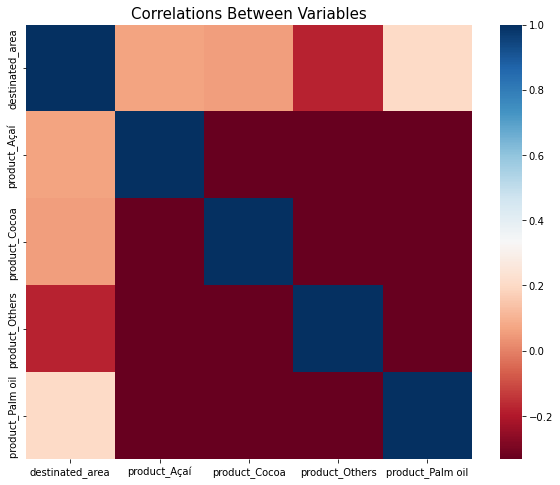

In [9]:
#Visualizing the correlations between numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(permanent_data.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()


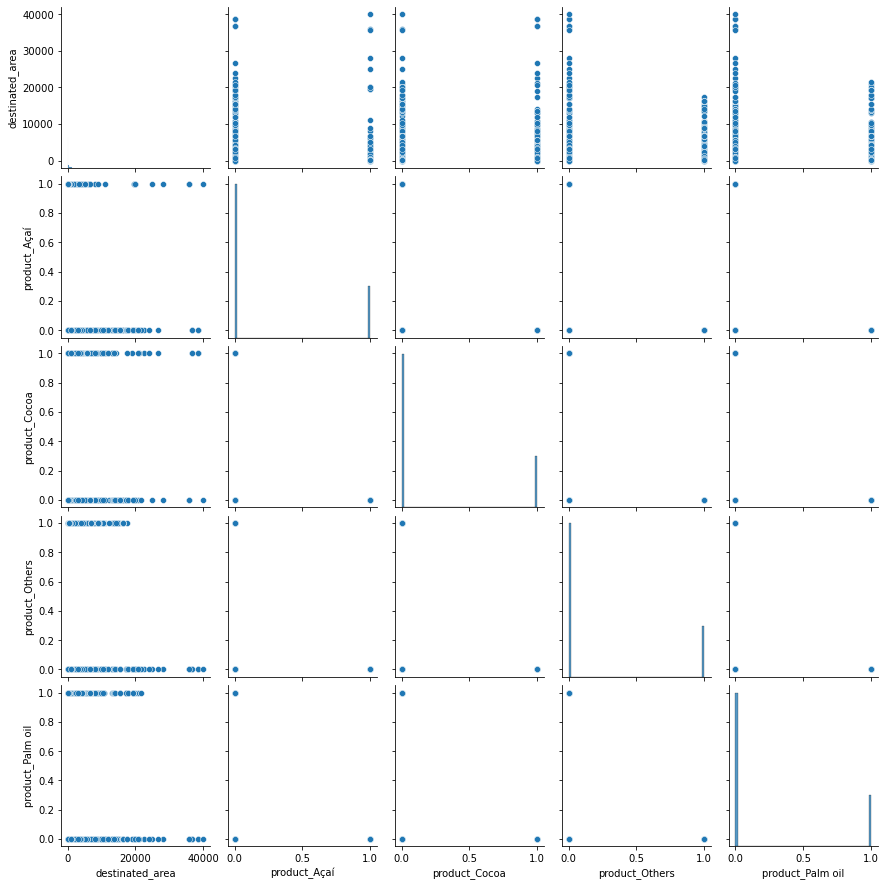

In [10]:
#Visualizing the Correlation between the numerical variables using pairplot visualization
num_cols = ['destinated_area','product_Açaí','product_Cocoa','product_Others','product_Palm oil']
sns.pairplot(permanent_data[num_cols]);

C:\Users\SamuelPorto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


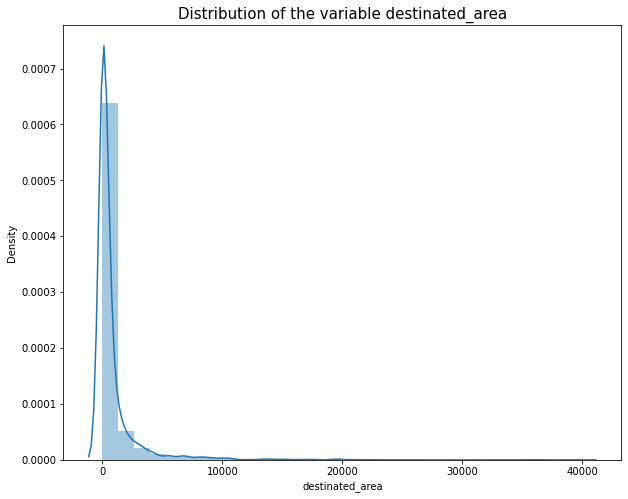

In [12]:
# Plotting the distribution of the variable destinated_area
# iqr_destinated_area = permanent_data['destinated_area'].fillna(
#     np.mean(permanent_data['destinated_area']))

iqr_destinated_area = permanent_data['destinated_area'].fillna(0)

percentiles = np.percentile(iqr_destinated_area, [25, 75])

# Filter destinated_area to only include values between percentile 0.25 and 0.75
iqr_destinated_area = iqr_destinated_area[(iqr_destinated_area > percentiles[0]) & (
    iqr_destinated_area < percentiles[1])]

plt.figure(figsize=(10, 8))
sns.distplot(permanent_data['destinated_area'], bins=30)
plt.title("Distribution of the variable destinated_area", size=15)
plt.show()
